# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [58]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

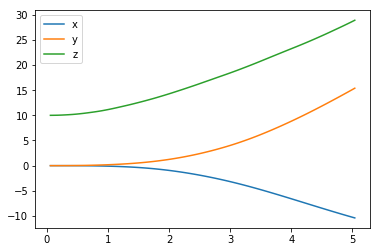

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

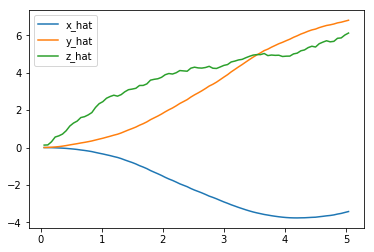

In [60]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

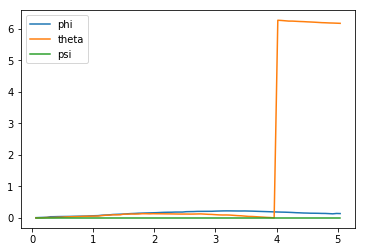

In [61]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

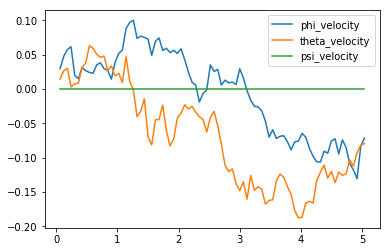

In [62]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

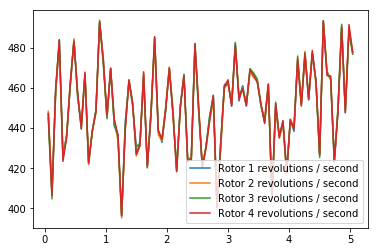

In [63]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [64]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-10.39226549  15.39318571  28.90652091   0.13801708   6.17587541   0.        ]
[-3.41635007  6.79916147  6.1155704 ]
[-0.07133658 -0.07949036  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [65]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -1.076 (best =  -0.974), noise_scale = 3.255

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [72]:
import sys
import pandas as pd
from agents.agent import DDPG
from task import Task
import numpy as np

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = DDPG(task) 

labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}
rewards =[]
for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    local_rewards = []
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        local_rewards.append(reward)
        
        agent.step(action, reward, next_state, done)
        state = next_state
        
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v)
        to_write +=  list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        
        if done:
            rewards.append(np.average(local_rewards))
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(
                i_episode, agent.score, agent.best_score), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -1.314 (best =  -1.244)

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

[-1.3043177433593549, -1.353598477615779, -1.2823853305480586, -1.5333275314321237, -1.4074684308028891, -1.2179265445963645, -1.589851304765757, -1.4045275457409543, -1.3276524908159237, -1.4506214644373785]
1000
-1.28520503974


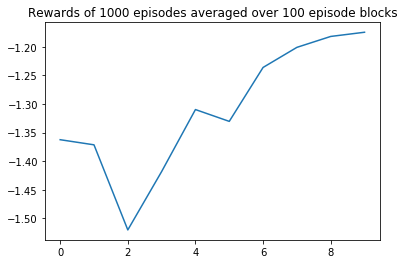

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

print(rewards[:10])
print(len(rewards))

divisions = len(rewards) // 100
steps = len(rewards) // divisions
ave_rewards = [np.average([j for j in rewards[steps * i:steps * (i + 1)]]) for i in range(divisions)]
plt.title('Rewards of {} episodes averaged over 100 episode blocks'.format(num_episodes))
plt.plot(ave_rewards)

# mean rewards over last 10 episodes
print(np.average(rewards[-10:]))

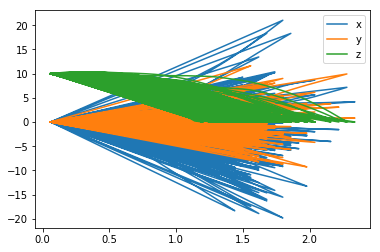

In [79]:
plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: The task function initialises the physics simulator which brings back some rewards due to the action taken. The task was also adjusted to add the angular velocities vector to the state vector. Accordingly the state size was adjusted and the reward function was changed to better account for the task. Considering our aim is to simply hover in the air in a stable fashion, and the biggest obstacle for the copter is to stay airborn and stable by adjusting the 4 rotor speeds, The reward function was adjusted to penalize any angular velocity magnitude. In this way the copter will learn to reward parameters where the angular velocity was nearest to zero. The angular velocity vector is converted to 0-3.14, then normalized to have magnitude 0-1 and scaled by 0.2 when used to calculate for the reward. The reward is also clipped to between -1 and 1 to better help the neural networks learn the gradient parameters without high magnitude deviations. 

It turned out that adding the angular velocity parameters to the state vector had a detrimental effect to finding the optimal solution over the small number of iterations I had performed, and so this was reverted. The other discussed changes however are still in place. In addition I have taken the logarithm of the distance between the current and target positions scaled by 0.2, plus one. This helps keep larger values penalized more even while clipping the reward to absolute value of 1. 

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you? 
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: Initially, I attempted to add additional weight layers to the random policy search algorithm in order to make a more complex search space. Although this improved the best performance, the overall average was not improving over time, only by chance. The DDPG architecture was then adapted that showed good improvements in learning the action parameters for the copter. In this architecture, a neural network is used to learn the action vector parameters that give the best reward over time. The final choice of discount rate is 0.99 which is almost considering all previous steps with the same influence on the reward calculation.

Tau is the update parameter associated with how fast we update the weights of the neurons and reducing this value helped avoid the network undergoing fallbacks from the gradual learning that we expect to see. It was observed that the rewards were improving and then being reduced again in an oscillatory fashion. Setting the tau value from 0.01 to 0.0015 helped overcome this difficulty in achieving continuous and gradual learning. The actor neural network has a learning rate of 0.00005 and the critic network has a learning rate of 0.0005. They both use the Adam gradient optimizer to help adjust for learning at different weight gradient magnitudes. These values are crucial for the network to be able to learn over the small number of iterations that we are able to process. 


OU Noise is a statistical method used to bring experience replay to this reinforcement learning problem. Experience replay helps randomize the actions or events taken in the episode in order to avoid correlated bias to be learnt. This is useful as the repetitive nature of reinforcement learning processes assert correlated patterns to the neurons used to learn behaviour. The exploration parameters associated with the OU Noise method are as follows:
theta = 0.05, sigma = 0.1 with mu set to 0. Theta is the main exploration parameter with sigma being the spread around the selected mean values. Reducing these values help bring more stability to the long-term learning process as with the tau constant.

The actor and critic parts use similar neural networks where the actor uses three dense layers of (200,400,200) nodes, and the critic uses two layers of (200, 400) nodes. TThe critic uses two identical network branches of this shape, one for each of state and action vectors. The sizes of these layers were gradually increased while observing the improvement to the rewards gained over time. The complexity of the neurons can be increased when a learning plateau is observed, if no signs of overfitting are observed. All dense layers are initialised using a random normal distribution and regularized by L2 and dropout methods to reduce chances of overfitting. Batch normalization was introduced to further avoid gradient vanishing and is followed by relu activation at the internal layer boundaries.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: Although the reward is improving over the course of 1000 episodes, there are dips in the rewards at various points due to either parameter randomization (OU Noise) or overfitting or other reasons due to complexity of the gradient space. The fact that we are gradually improving shows the reward is well described and the agent has done well in exploring the action space and also improving the overall performance. An average reward of -1.28 over the last 10 episodes is observed and it appears that the initial values of the neurons are not able to steer the copter towards flying indefinitely. There is a small gain in the reward over the 1000 episodes and it is possible that after training for several weeks, this very network can learn to fly indefinitely. From the position plots we can see that the copter stays in the desired (0,0,10) location for around 0.25 of a second, and slowly moves towards random directions, showing a lack of impact form the reward training procedure. It can also be seen that the Z dimension position is impacted more than the other two which have been at or around 0, showing that it is easier for the copter to keep its height stable, and so the reward algorithm correctly gives more priority to stable hovering and reducing angular velocities.

Due to the large number of hyper parameters and the highly random environment and state selection procedures, it is extremely hard to find isolated changes in the paramters that have a reasonable affect on the training behaviour. It is crucial to learn over longer periods and reduce the randomness in the training process and give better initial values to be able to train over 1000 episodes.


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: The challenging part of this project was to understand the reward function that would be able to teach the several neural networks at work the correct behaviour. Since there is no obvious shape the weights would take, the calculation of this reward can be rather arbitrary, and small adjustments can make a big improvement without a clear connection. I was surprised to see adding the angular velocity to the state made this learning process even harder rather than helping by adding more relevant data. It is clear that the shape and parameters of the neural network are crucial for the agent to learn efficiently. However training using the neural network is extremely slow in comparison to CPU processing, and so training the correct behaviour or optimizing the hyper parameters can be time-consuming. I am pleased to see the learning process has reacted to the reward definition to find more stability in the hovering task and small changes to the network parameters and that adjusting the reward could have a coarse effect on the observed trajectory of the copter.